# General Remarks

- Please complete all tasks (text and code) directly in this notebook
- Save the notebook with your first name and surname in the filename:  e.g. **Klausur_ThomasManke.ipynb**
- Submit as github repo (preferred), alternatively you can upload the notebook to the CQ portal (and share with me)
- This test will cover three parts: Markov chains, Hidden Markov Models, Artifical Neural Networks
- Each part will need their own and sometimes overlapping packages to import (e.g numpy). Even if it is redundant, import the relevant parts explicitly at the beginnig of each part.
- Complete the code cells in their respective sections and add (concise) text, where more verbal explanations are required. Comments in the code cells are also welcome.
- Feel free to add multiple code cells if you prefer, but make sure that they stay in their respective sections
- All tasks have been tested with mybinder.org and should run on any modern laptops (with 2 GB free RAM).
Make sure to switch off other resource hungry programs.
If you encounter any technical problems, please inform me immediately !
- Deadline for submission: **21.06. 2022 15:30**


---



In [ ]:
# Note from Bilal: sorry but I may upload this to my GitHub as a demonstration in the portfolio
# My GitHub is semi-anonymous so I have crossd out my last name after the initial


2


# Markov Chains

##  The story: A ball game

Alice, Bob and young Clemens are playing a new ball game - here are the rules:
- If Alice has the ball, she will throw a (fair 6-sided) die and keep the ball if she throws a 6, otherwise she'll pass the ball to Bob
- If Bob has the ball, he'll pass it to Alice or Clemens, based on the throw of a fair coin
- If Clemens has the ball he'll return it to the child from whom he got it 

At the beginning of the game, their father throws the ball to Alice or Bob.
However, he is three times more likely to throw it to Alice, and he never throws it to Clemens.

## The Tasks

Translate the story into a Markov Model. 
Optionally: add a scanned drawing of the Markov graph as jpeg file to this notebook.

- What are the states and how many states are there?
- What is the initial state distribution ? Write it down as numpy.array below.
- Write down the transition matrix as numpy.array.
- Does the Markov Model have a stationary distribution - and does your answer depend on whether Alice has a fair die? 
- Validate your answer numerically with the "matrix power method". 
- For each child, give their long-term probabilities that they hold the ball. 
- Bonus: In the fair die scenario, what is the number of steps that Alice can expect to hold the ball before having to pass it on. 

## Your solutions

In [ ]:
# import the necessary modules # Bilal: Some of these are preemptive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tensorflow as tf
%matplotlib inline

def generate_sequence(P, s=0, T=100):

  assert P.shape[0]==P.shape[1],         "generate_sequence: P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "generate_sequence: P should be a stochastic matrix"

  ns = P.shape[0] # number of states
  L = [s]         # initial state

  # loop for T time steps
  for t in range(T):
    s = np.random.choice( ns, p = P[s, :] )
    L.append(s)
  return L

# 3 states: 0=Alice,1=Bob,2=Clemens
tm = np.array([[1/6,5/6,0.],
              [0.5,0.,0.5],
              [0.0,1.,0.]])
print("FAIR DIE")
# Inherently before matrix power: ball can end up in state of non-flux, with either alice and bob, or bob and clemens, passing the ball to each other
# Therefore I think that there will be a stationary distribution
X=generate_sequence(tm, np.random.choice(3, p=[0.75,0.25,0.])) # set INITIAL STATE randomly based on this distribution
# as array: np.array([0.75,0.25,0.])
print(*X, sep='')
print()

from numpy.linalg import matrix_power
print(f't=9: {matrix_power( tm,9 )}\n\nt=99: {matrix_power( tm,99 )}\n\nt=999: {matrix_power( tm,999 )}\n\nt=9999: {matrix_power( tm,9999 )}')
# Having run this, 99 < t <= 999 to cause the stationary distribution, when alice has fair die

stat_dist = matrix_power(tm, 999)

print('\nlong-term probabilities with fair die of Alice, Bob and Clemens holding the ball, respectively:    ', stat_dist[1])

# Now for the first unfair die
print("\nUNFAIR DIE 1 (unfair die, in Alice's favour to keep ball)")
# Inherently before matrix power: ball can end up in state of non-flux, with either alice and bob, or bob and clemens, passing the ball to each other
# Therefore I think that there will be a stationary distribution
# (Again, the only continuous path this can go on is a loop around the states, otherwise ends up as the same pairs of people passing the ball)
tm = np.array([[0.5,0.5,0.],
              [0.5,0.,0.5],
              [0.0,1.,0.]])
X=generate_sequence(tm)
print(*X, sep='')
print()

#from numpy.linalg import matrix_power
print(f't=9: {matrix_power( tm,9 )}\n\nt=99: {matrix_power( tm,99 )}\n\nt=999: {matrix_power( tm,999 )}\n\nt=9999: {matrix_power( tm,9999 )}')
# Having run this, 9 < t <= 99 to cause the stationary distribution, when alice has unfair die (0.5 probability of rolling 6)

stat_dist = matrix_power(tm, 99)

print(f'\nlong-term probabilities with unfair die 1, of Alice, Bob and Clemens holding the ball, respectively:\n    {stat_dist[1]}\n')


# Now for the second unfair die. I also tried an impossible die of 5/6,1/6,0, which would (and does) get you a very fast convergence due to added absorbance of Alice/Bob transition probability
# This also 
print("\nUNFAIR DIE 2 (unfair die, against Alice keeping ball)")
# Inherently before matrix power: ball can end up in state of non-flux, with either alice and bob, or bob and clemens, passing the ball to each other
# Therefore I think that there will be a stationary distribution
# (Again, the only continuous path this can go on is a loop around the states, otherwise ends up as the same pairs of people passing the ball)
# (This one will probably be reached at a higher t value!)
tm = np.array([[1/12,11/12,0.],
              [0.5,0.,0.5],
              [0.0,1.,0.]])
X=generate_sequence(tm)
print(*X, sep='')
print()

#from numpy.linalg import matrix_power
print(f't=9: {matrix_power( tm,9 )}\n\nt=99: {matrix_power( tm,99 )}\n\nt=999: {matrix_power( tm,999 )}\n\nt=9999: {matrix_power( tm,9999 )}')
# Having run this, 99 < t <= 999 to cause the stationary distribution, when alice has unfair die (0.5 probability of rolling 6)

stat_dist = matrix_power(tm, 999)

print(f'\nlong-term probabilities with unfair die 2, of Alice, Bob and Clemens holding the ball, respectively:\n    {stat_dist[1]}\n')

# From the predictions, validated by my matrix power test results, it appears that there is always a stationary distribution regarding whether or not Alice has a fair die

# reset tm to fair-die conditions and generate new sequence
tm = np.array([[1/6,5/6,0.],
              [0.5,0.,0.5],
              [0.0,1.,0.]])
print('sequence probabilities reset\nNew sequence:')
X=generate_sequence(tm)
print(*X, sep='')
print()
#print('expected stretch for Alice: ', ...)
def StateDuration(L, s=0):
  # helper function to calculate the "duration" of a given element s in list L
  # --> calculate the length of consecutive occurences
  count=0
  res=[]
  for e in L:
    if e==s:
      count +=1
    else:
      if (count > 0):
        res.append(count)
      count=0

  if (count>0):
    res.append(count)
  return res

i = [0,1,2]

for j in i:
    exp = 1/(1-tm[j,j]) # expected duration
    res = StateDuration(X, s=j)
    if j == 0:
      print('Alice: expected duration: {} average in this sequence: {}'.format(exp, sum(res)/len(res)))
    elif j==1:
      print('Bob: expected duration: {} average in this sequence: {}'.format(exp, sum(res)/len(res)))
    elif j==2:
      print('Clemens: expected duration: {} average in this sequence: {}'.format(exp, sum(res)/len(res)))
    else:
      print("Something is up")

FAIR DIE
01212121212101212101212101210121010121210121010121012101010101212121210101010101012100100121212101210

t=9: [[0.19722673 0.6691341  0.13363918]
 [0.40148046 0.22376692 0.37475262]
 [0.16036701 0.74950524 0.09012774]]

t=99: [[0.28564528 0.47634094 0.23801378]
 [0.28580457 0.47599362 0.23820181]
 [0.28561653 0.47640362 0.23797985]]

t=999: [[0.28571429 0.47619048 0.23809524]
 [0.28571429 0.47619048 0.23809524]
 [0.28571429 0.47619048 0.23809524]]

t=9999: [[0.28571429 0.47619048 0.23809524]
 [0.28571429 0.47619048 0.23809524]
 [0.28571429 0.47619048 0.23809524]]

long-term probabilities with fair die of Alice, Bob and Clemens holding the ball, respectively:     [0.28571429 0.47619048 0.23809524]

UNFAIR DIE 1 (unfair die, in Alice's favour to keep ball)
00012100000012121012100010010121001000012101212101212121212101001210121012100121210010101000010000010

t=9: [[0.38867188 0.4296875  0.18164062]
 [0.4296875  0.32226562 0.24804688]
 [0.36328125 0.49609375 0.140625  ]]

t=99: [[0.

Your verbal answers here:

# TM comments
- You have used all the right tool and got the right answers - including the bonus.
- I also liked your detailed exploration into convergence etc - which was more than requested.
- I did have some problems with your more verbose statements (e.g. "state of non-flux"), which I could not decipher, but you clearly tried hard to conceptualize the process.
- As for the biased die, I was hoping for a more general discussion, rather than on instance (p=1/12).
generally a unique stationary distribution exists if
1) all states are connected (irreducibility) and
2) the chain is aperiodic.

Basically this is true for all P[0,0]>0.
If P[0,0] the Markov chain is periodic (Bob gets every second ball) and does not have a stationary distribution.

# Hidden Markov Models

## A story

The DNA of a (hypothetical) organism exists in 3 different configurations (0,1,2) that cannot be observed directly. They are, however, characterized by a specific distribution of observable nucleotides (A,C,G,T) that are emitted from each state. The state transition rates and emission rates are shown in the figure below.
<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/HMM_DNA.jpg",  width="1000">
</div>


This problem can be modelled as a hidden Markov Model.










## Tasks

1. Write down the HMM parameters as numpy arrays. The initial state probability $\pi$ is not given, but you may assume that it is the stationary distribution of state transitions - calculate it and report it.

2. Using MultinomialHMM() from the hmmlearn package, set up a probabilistic model with the parameters $(\pi, P, E)$.

3.  Sample a sequence of 2000 hidden states $Z$ and the corresponding observations $X$ from the model. Use a random seed = 42 for reproducibility.
Report the first 20 pairs of hidden states and observations.


4. Calculate the logarithm of the probability $\log Pr(X)$ given the model from which you generated $X$ - why is it so low (1-2 sentences)?

5. Name two algorithms to decode the "best" possible path of hidden states $Z$ from observations $X$ and a given model. Briefly describe their different goals (2 sentences).
Run the respective function from hmmlearn to calculate 
$Z$ for both methods, given the $X$ and the current model.
Save the result as $Z_1$ and $Z_2$.
Report the number of differences between $Z_1$ and $Z_2$.

6. Use the hmmlearn implementation of the Baum-Welch algorithm to determine the best parameters for the HMM model, if only $X$ is given. 
  - You will have to define a new model that does not yet know any parameters (e.g. model_fit). 
  - You may assume that the number of hidden states is known to be 3.
  - Set "np.random.seed(1)" and run 500 iterations. 
  - Compare the results with your knowlegde of parameters from the generating model for $X$. You might want to round the fitted parameters to two digits: np.round(...,2)
  - Comment on possible difference and name two ways in which you might improve the parameter fit.

## Load the Software

In [ ]:
# install hmmlearn (if necessary)
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 7.2 MB/s 


In [ ]:
# import modules you need
import pickle

from hmmlearn import hmm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tensorflow as tf
%matplotlib inline

## Your solution

In [ ]:
np.random.seed(42)                       # as requested
P = np.array([[.75,.25,0.],
              [0., 0.9,0.1],
              [0.2, 0.,0.8]]) # transitions
# emission: A=0, C=1,G=2,T=3              
E = np.array([[0.0,0.5,0.5,0.0],
              [.25,.25,.25,.25],
              [0.5,0.0,0.0,0.5]]) # emission
#We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
evals, evecs = np.linalg.eig(P.T)
evec1 = evecs[:,np.isclose(evals, 1)]

#Since np.isclose will return an array, we've indexed with an array
#so we still have our 2nd axis.  Get rid of it, since it's only size 1.
evec1 = evec1[:,0]

pi = evec1 / evec1.sum()

#eigs finds complex eigenvalues and eigenvectors, so you'll want the real part.
pi = pi.real
print(pi) # = [0.21052632 0.52631579 0.26315789]

# define model
from hmmlearn import hmm



# define HMM and set parameters
model = hmm.MultinomialHMM(n_components=3)
model.startprob_ = pi                    # initial state prob
model.transmat_  = P                     # transition prob
model.emissionprob_ = E                  # emission prob

# generate sequence
X,Z = model.sample(2000)                   # c.f. Z, X = generate_HMM(P,pi,E)
print('states Z       =',*Z.flatten())
print('observations X =',*X.flatten())

# print(X) sequence of emissions if you want it

print('Z=', *Z[:20])
print('X=', *X.flatten()[:20])

# log P(X)
# score var
score = model.score(X)
print('log P(X) = ', score)

# two ways to predict best path
_, Z1 = model.decode(X, algorithm='viterbi') # using viterbi alg

_, Z2 = model.decode(X, algorithm='map') # using maximum a posteriori/fwd-bkwd alg

# # differences between two paths Z1 and Z2
print('differences (Z1(Viterbi)-Z2(MaxPost)): ', np.sum(Z1 != Z2))
print("")

# new model for fit
np.random.seed(42)
model_fit = hmm.MultinomialHMM(n_components=3, n_iter=999)
model_fit.fit(X)
Fscore = model_fit.score(X)

# print results
print('fit score:    ', Fscore )

print('fitted P: \n', np.round(model_fit.transmat_,2))
print('known P: \n', P)
print('')
print('fitted E: \n'  , np.round(model_fit.emissionprob_,2))
print('known E: \n', E)



[0.21052632 0.52631579 0.26315789]
states Z       = 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 0 1 2 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 2 2 2 2 0 1 1 2 2 2 2 2 0 0 0 0 0 0 0 1 1 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 1 2 0 0 1 1 1 1 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 0 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 1 1 2 2 2 0 1 2 2 2 2 2 2 2 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 

# TM comments:

- very elegant solution to determine pi - the eigenvalue approach went beyond our simple approach with matrix powers. Well done.

- I would have hoped for more discussions on the small score (log P(X)), and possible improvements on the simple Baum-Welch fit.
Are you satisfied with the predicted parameters ? BTW they are numerically correct - given your choices. Moreover, they would have been closer to the true parameters if you had set np.random.seed(1).

# Artificial Neural Networks




## The Data

The MINST-Fashion dataset contains a large number of (small and coarse-grained) images from fashion items. This set has been annotated with labels for both traing and test data sets.

Link: https://www.tensorflow.org/datasets/catalog/fashion_mnist

The goals is to construct a Neural Network that can predict the fashion label from a given image.

The sections below will describe the individual tasks.

## Load Packages

In [ ]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tensorflow as tf
%matplotlib inline
from keras.datasets import mnist

class_names = ['T-shirt/top','Trouser','Pullover','Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# a convenience function
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

## Load Data

This section is given purposefully. Simply run it to get train and test data together with the respective labels. 

Also keep the normalization as is.

In [ ]:
np.random.seed(42)
mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



# normalization
#X_train, X_test = X_train / 255.0, X_test / 255.0

### downsampling to avoid kernel crashes with small RAM (e.g Binder)
n_down = 10000
n_down_test = int(n_down/5)

if (n_down>0):
  np.random.seed(42)
  print('train-before:', X_train.shape, Y_train.shape)
  print('test-before: ', X_test.shape, Y_test.shape)
  id_train = np.random.choice(X_train.shape[0],n_down)
  id_test  = np.random.choice(X_test.shape[0],n_down_test)
  X_train, Y_train = X_train[id_train, ...], Y_train[id_train, ...]
  X_test, Y_test = X_test[id_test, ...], Y_test[id_test, ...]
  print('train-after:', X_train.shape, Y_train.shape) # after downsampling
  print('test-after: ', X_test.shape, Y_test.shape) # after downsampling

train-before: (60000, 28, 28) (60000,)
test-before:  (10000, 28, 28) (10000,)
train-after: (10000, 28, 28) (10000,)
test-after:  (2000, 28, 28) (2000,)


## TM comment

The downsampling was not really necessary, but you did well.
However, it would be good to retain the normalization to have all pixel values between 0 and 1.

## Data Exploration and Preprocessing

- How many images (=samples) are included in the training data? 
- What is the shape of these images?
- How many distinct labels does it have? 

In [ ]:
#model.summary()
#print(N_Train, _Test.shape) before and after downsampling
#print(N_Train[i])
#min(data), max(data)
np.random.seed(42)
nc = np.unique(class_names).size  # number of classes / labels in training set
print(f'Number of training images: {X_train.shape[0]}')
print(f'Shape of images themselves: {X_train.shape[1]}x{X_train.shape[2]}')
print(f'Number of unique image labels: {nc}')
print(X_train.shape) # from output: training data downsampled is 10000 iages of size 28x28
print(X_test.shape) # from output: test data downsampled is 20% of line above
print(Y_train.shape) # 10000 non-unique labels in training data downsampled
print(Y_test.shape) # 20% of that in test data downsampled


Number of training images: 10000
Shape of images themselves: 28x28
Number of unique image labels: 10
(10000, 28, 28)
(2000, 28, 28)
(10000,)
(2000,)


## Define Model and Learning Strategy

Construct an artifical neural network with

- an input layer that takes the proper shape of images
- a dense layer with 128 nodes including a 'ReLu' activation function for non-linear mapping 
- an output layer corresponding to the number of classes in the problem and a softmax activation function

Use the Adam optimizer and define a suitable loss function.
Make sure that during the learning process you will track both loss and 'sparse_categorical_accuracy' as metrics.

Summarize the model. How many parameters does it have?

In [ ]:
# Define Model and Learning strategy here
np.random.seed(42)
#nc = np.unique(class_names).size  # number of classes / labels in training set
input_shape = X_train.shape[1:]
print(f'input shape: {input_shape}')

model = tf.keras.Sequential( name = 'MNIST_model')
model.add( tf.keras.layers.Flatten(input_shape=input_shape) )                # flattens input to vector
model.add( tf.keras.layers.Dense(128, activation='relu',name='1st_layer') )  # add layer with 128 nodes + relu
model.add( tf.keras.layers.Dense(nc, activation='softmax', name='softmax_layer') )

l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'
model.compile(optimizer='adam', loss=l_name, metrics=a_name)

model.summary()

#Output:
#input shape: (28, 28) #### this is correct
#Model: "MNIST_model"
#_________________________________________________________________
# Layer (type)                Output Shape              Param #   
#=================================================================
# flatten (Flatten)           (None, 784)               0         
#                                                                 
# 1st_layer (Dense)           (None, 128)               100480    
#                                                                 
# softmax_layer (Dense)       (None, 10)                1290      
#                                                                 
#=================================================================
#Total params: 101,770
#Trainable params: 101,770
#Non-trainable params: 0
#_________________________________________________________________

input shape: (28, 28)
Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

Fit the model to the training data for 10 epochs - 
use 10% of the ttraining data for validation.

Once the fit is finished you may save the model.

In [ ]:
np.random.seed(42)
fh = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1) # batch size 64 after trial/error. 32 causes loss value to go up and down, while 128 doesn't reach near convergence after 10 epochs

#model_fn   = model.name + '.h5' # thought that saving was causing downstream bugs. In fact, this was a naming error
#history_fn = model.name + '_history.npy'
#model.save(model_fn)

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 21.2776 - sparse_categorical_accuracy: 0.6669 - val_loss: 7.5865 - val_sparse_categorical_accuracy: 0.7500
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 6.3464 - sparse_categorical_accuracy: 0.7523 - val_loss: 4.7504 - val_sparse_categorical_accuracy: 0.7690
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 3.6255 - sparse_categorical_accuracy: 0.7832 - val_loss: 2.9931 - val_sparse_categorical_accuracy: 0.8110
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 2.5817 - sparse_categorical_accuracy: 0.7816 - val_loss: 1.9651 - val_sparse_categorical_accuracy: 0.7490
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 1.2723 - sparse_categorical_accuracy: 0.7359 - val_loss: 1.4419 - val_sparse_categorical_accuracy: 0.7620
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.9056 - sparse_categoric

## Evaluate the Model

Plot the history of loss and accuracy for the training and validation set and compare it the same metrics obtained (after fitting) for the test data.

Are there any indications for overfitting - explain this briefly (1-2 sentences).

63/63 [==============================] - 0s 1ms/step - loss: 1.3331 - sparse_categorical_accuracy: 0.7695


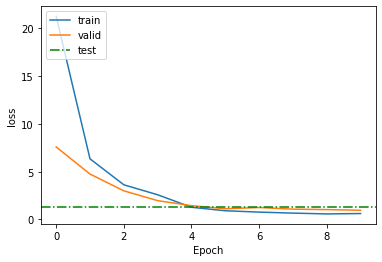

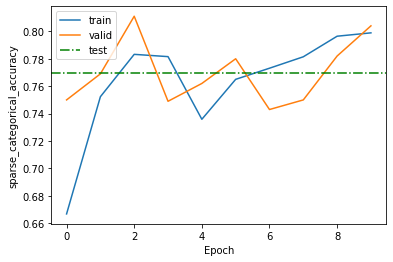

In [ ]:
# Evaluation & Learning history
np.random.seed(42)
def plot_fit_history(fh, name='loss', test_score=0):
  """Plots history of metrics 'name'
  The validation metrics will also be plotted if available as 'val_name' (Keras convention)
  A test_score can be added to compare the evolution"""

  if name not in fh.history:
      print('plot_fit_history: {} is not a key in history !'.format(name))
      return
  val_name = 'val_' + name
  plt.plot(fh.history[name],     label='train')

  if val_name in fh.history:
    # add validation if in data
    plt.plot(fh.history[val_name], label='valid')

  plt.axhline(y=test_score, color='green', linestyle='-.',label = 'test')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend(loc='upper left')
  plt.show()

test_loss, test_acc = model.evaluate(X_test, Y_test)

a_name='sparse_categorical_accuracy'
plot_fit_history(fh, 'loss', test_loss)
plot_fit_history(fh, a_name, test_acc)

#TM comments
Given those plots, are there any signs of overfitting.
Answer: with you subsampled data there are not. With the full data you would have seen indications that the accuracy on the training data is larger than on validation and test.

## Inspect predictions

Inspect the training image with index 43 and compare the predicted label with the true label.

Compare all predicted label from the training set with all true labels - you may want to use the plot_cm() funcion defined above.

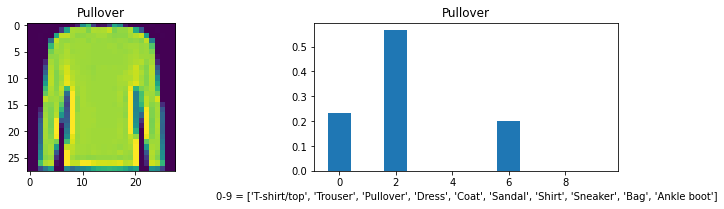

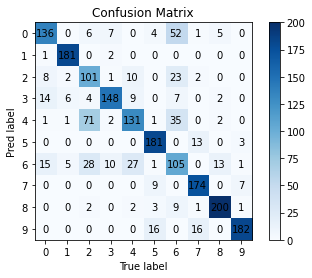

In [ ]:
#id=43
from sklearn.metrics import confusion_matrix
#%%script echo chose an index of your choice
np.random.seed(42)
idx=43
X = X_test[idx]
X = np.expand_dims(X, axis=0)

pred = model.predict(X)
i_max=np.argmax(pred)
true_lab=class_names[Y_test[idx]]
pred_lab=class_names[i_max]

plt.figure(figsize=(12,6))
ax = plt.subplot(2,2,1)
plt.imshow(X_test[idx]) 
plt.title(true_lab)

ax = plt.subplot(2,2,2)
ax.set_xlabel(f'0-9 = {class_names}')
plt.bar(range(10), pred[0])
plt.title(pred_lab)
plt.show() # seed does not cause reproducible ML results, as one might expect


### Learning history as text
#for idx in Y_test:
  
#  X = X_test[idx]
#  X = np.expand_dims(X, axis=0)

#  pred = model.predict(X)
#  i_max=np.argmax(pred)
#  true_lab=class_names[Y_test[idx]]
#  pred_lab=class_names[i_max]
#  print(f'Image of: {true_lab}, Prediction given: {pred_lab}')




model_pred = model.predict(X_test)          # probabilities    
y_pred    = np.argmax(model_pred, axis=1)   # classes with max prob (= labels)
cm=confusion_matrix(y_pred, Y_test)
plot_cm(cm)


### Originally the 'for' loop told me more information about the learning history of the machine
### Please feel free to uncomment this in and inspect it for yourself :)
#  plt.figure(figsize=(12,6))
#  ax = plt.subplot(2,2,1)
#  plt.imshow(X_test[idx]) 
#  plt.title(true_lab)

#  ax = plt.subplot(2,2,2)
#  plt.bar(range(10), pred[0])
#  plt.title(pred_lab)
#  plt.show()

#... obtain confusion matrix ...


#TM comments:

You have used the test data rather than the "training data" from my original question. This is good as it show that you understand what is proper - and are not distracted by errorneous questions.


## Suggestions for improvements

Make suggestions for possible improvements to the model and the fitting process

- More data to train the model with
- Comparison of different ML algorithms (for reproducibility)
- A repeated blind check by humans for outlier images, which could bias the model if one isn't careful


# TM comments:

Interesting and creative suggestions and I would agree with all of them.
Missing are perhaps the obvious candidates I was fishing for:

- change epochs to reduce overfitting (not a problem in you case)
- change number of neurons to improve accuracy
- include convolutional layers and filters to learn spatial features